## Processing and Data Analysis on FlightDelays dataset

### Data cleaning

Import libraries

In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns

Read csv file

In [3]:
df = pd.read_csv('DelayedFlights.csv')

View DataFrame

In [4]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
5,6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
6,10,2008,1,3,4,706.0,700,916.0,915,WN,...,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
7,11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
8,15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,...,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
9,16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


View the dataframe index and columns

In [5]:
df.index

RangeIndex(start=0, stop=1936758, step=1)

In [6]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Dataset contains 30 variables and around 2 million records. For our analysis we will eliminate some of the columns that represent derivable or not important information.Remember that all data for year 2008.

In [7]:
df1=df.drop(df.columns[[0,1,5,7,8,10,11,12,13,14,15,18,20,21,22,23,24,25,26,27,28,29]], axis=1)
df1

,Month,DayofMonth,DayOfWeek,CRSDepTime,UniqueCarrier,DepDelay,Origin,Distance
0,1,3,4,1955,WN,8.0,IAD,810
1,1,3,4,735,WN,19.0,IAD,810
2,1,3,4,620,WN,8.0,IND,515
3,1,3,4,1755,WN,34.0,IND,515
4,1,3,4,1915,WN,25.0,IND,688
5,1,3,4,1830,WN,67.0,IND,1591
6,1,3,4,700,WN,6.0,IND,828
7,1,3,4,1510,WN,94.0,IND,828
8,1,3,4,1020,WN,9.0,IND,162
9,1,3,4,1425,WN,27.0,IND,1489


To see records with null values

In [8]:
null_data = df1[df1.isnull().any(axis=1)]
null_data

,Month,DayofMonth,DayOfWeek,CRSDepTime,UniqueCarrier,DepDelay,Origin,Distance


There is no null data inside of records left in database. Thus way we can skip the step of dropping or replacing rows with missing values.

Save clean dataset in csv file

In [9]:
df1.to_csv('FlightsClean.csv')

Open clean dataset for further analysis

In [10]:
df2 = pd.read_csv('FlightsClean.csv')

In [11]:
df2

,Unnamed: 0,Month,DayofMonth,DayOfWeek,CRSDepTime,UniqueCarrier,DepDelay,Origin,Distance
0,0,1,3,4,1955,WN,8.0,IAD,810
1,1,1,3,4,735,WN,19.0,IAD,810
2,2,1,3,4,620,WN,8.0,IND,515
3,3,1,3,4,1755,WN,34.0,IND,515
4,4,1,3,4,1915,WN,25.0,IND,688
5,5,1,3,4,1830,WN,67.0,IND,1591
6,6,1,3,4,700,WN,6.0,IND,828
7,7,1,3,4,1510,WN,94.0,IND,828
8,8,1,3,4,1020,WN,9.0,IND,162
9,9,1,3,4,1425,WN,27.0,IND,1489


### Data processing and analysis

In [12]:
df2.columns

Index(['Unnamed: 0', 'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime',
       'UniqueCarrier', 'DepDelay', 'Origin', 'Distance'],
      dtype='object')

Rename columns for clarity

In [13]:
df2.rename(columns={'CRSDepTime':'SchedDepTime', 'UniqueCarrier':'Carrier'}, inplace=True)
df2.columns

Index(['Unnamed: 0', 'Month', 'DayofMonth', 'DayOfWeek', 'SchedDepTime',
       'Carrier', 'DepDelay', 'Origin', 'Distance'],
      dtype='object')

Show average delay per month

In [14]:
MonthDelay=df2.groupby("Month")["DepDelay"].mean().reset_index(name ="DepDelay")
MonthDelay

,Month,DepDelay
0,1,43.545680
1,2,44.988440
2,3,42.885223
3,4,39.864115
4,5,39.041575
5,6,45.825926
6,7,46.659887
7,8,43.727971
8,9,38.236322
9,10,34.868737


To show top 3 months based on average departure delay time

In [15]:
print(MonthDelay.nlargest(3,"DepDelay"))

    Month   DepDelay
11     12  49.145089
6       7  46.659887
5       6  45.825926


Aggregate dparture and arrival delay time by day of week and sort in descending way

In [16]:
DayOfWeekDelay=df2.groupby("DayOfWeek")["DepDelay"].mean().reset_index(name ="DepDelay")
DayOfWeekDelay.sort_values(["DepDelay"], ascending=False)

,DayOfWeek,DepDelay
6,7,45.859422
1,2,44.075603
4,5,44.016943
0,1,43.227633
3,4,41.676591
5,6,41.480063
2,3,41.429611


To see carriers presented in database

In [17]:
print(df2["Carrier"].unique())

['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']


In [18]:
print(df2["Origin"].unique())

['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'LCH' 'BOS' 'MYR' 'CLL' 'DAB' 'ASE' 'ATW' 'BMI' 'CAK'
 'CID' 'CPR' 'EGE' 'FLG' 'FSD' 'FWA' 'GJT' 'GRB' 'HNL' 'KOA' 'LAN' 'LIH'
 'MBS' 'MDT' 'MFR' 'OGG' 'PSP' 'RAP' 'ROA' 'SBA' 'SBN' 'SPI' 'TEX' 'YUM'
 'AVP' 'CWA' 'DRO' 'ILM' 'ITO' 'JFK' 'TVC' 'HDN' 'S

In [19]:
df2.groupby("Origin")["DepDelay"].mean().reset_index(name ="DepDelay")

,Origin,DepDelay
0,ABE,59.461538
1,ABI,66.469388
2,ABQ,36.358254
3,ABY,49.448630
4,ACK,66.474490
5,ACT,44.222857
6,ACV,58.761023
7,ACY,79.310345
8,ADK,30.509434
9,ADQ,33.823529


In [20]:
df2.groupby(["Origin","Carrier"])["DepDelay"].mean()

Origin  Carrier
ABE     9E         58.967105
        EV         48.027451
        OH         70.388889
        OO         61.767857
        US         66.846154
        XE         44.029412
        YV         71.680000
ABI     MQ         66.469388
ABQ     AA         49.437768
        CO         52.722973
        DL         40.748971
        F9         32.070652
        MQ         60.921053
        NW         54.578431
        OO         40.653701
        UA         43.544554
        US         36.510204
        WN         32.863867
        XE         41.350276
        YV         38.083333
ABY     EV         49.448630
ACK     B6         90.651163
        OH         67.500000
        XE         56.720721
ACT     MQ         44.222857
ACV     OO         58.761023
ACY     EV         79.642857
        OH         70.000000
ADK     AS         30.509434
ADQ     AS         33.823529
                     ...    
TYR     MQ         57.238494
TYS     9E         60.451670
        DL         53.15384

Since statistics per airport of origin is not high enogth we will eliminate this factor from our analysis.
Drop the column "Origin"

In [21]:
df2.drop('Origin', inplace=True, axis=1,errors='ignore')
df2.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,DepDelay,Distance
0,0,1,3,4,1955,WN,8.0,810
1,1,1,3,4,735,WN,19.0,810
2,2,1,3,4,620,WN,8.0,515
3,3,1,3,4,1755,WN,34.0,515
4,4,1,3,4,1915,WN,25.0,688


Group time of departure into 1 hour time interval

In [22]:
df2['SchedDepTime']=df2['SchedDepTime']/100
df2.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,DepDelay,Distance
0,0,1,3,4,19.55,WN,8.0,810
1,1,1,3,4,7.35,WN,19.0,810
2,2,1,3,4,6.20,WN,8.0,515
3,3,1,3,4,17.55,WN,34.0,515
4,4,1,3,4,19.15,WN,25.0,688


In [23]:
df2['SchedDepTime'].describe()

count    1.936758e+06
mean     1.467473e+01
std      4.247668e+00
min      0.000000e+00
25%      1.135000e+01
50%      1.510000e+01
75%      1.815000e+01
max      2.359000e+01
Name: SchedDepTime, dtype: float64

In [24]:
for i in range(25):
    df2.loc[(df2['SchedDepTime'] <= i) & (df2['SchedDepTime'] > i-1), 'SchedDepTime'] = i
    
df2

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,DepDelay,Distance
0,0,1,3,4,20.0,WN,8.0,810
1,1,1,3,4,8.0,WN,19.0,810
2,2,1,3,4,7.0,WN,8.0,515
3,3,1,3,4,18.0,WN,34.0,515
4,4,1,3,4,20.0,WN,25.0,688
5,5,1,3,4,19.0,WN,67.0,1591
6,6,1,3,4,7.0,WN,6.0,828
7,7,1,3,4,16.0,WN,94.0,828
8,8,1,3,4,11.0,WN,9.0,162
9,9,1,3,4,15.0,WN,27.0,1489


Group distance of flight into equal bins of 500 miles each

In [25]:
df2['Distance'].describe()

count    1.936758e+06
mean     7.656862e+02
std      5.744797e+02
min      1.100000e+01
25%      3.380000e+02
50%      6.060000e+02
75%      9.980000e+02
max      4.962000e+03
Name: Distance, dtype: float64

In [26]:
for i in range(11):
    df2.loc[(df2['Distance'] <= i*500) & (df2['Distance'] > (i-1)*500), 'Distance'] = i
    
df2

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,DepDelay,Distance
0,0,1,3,4,20.0,WN,8.0,2
1,1,1,3,4,8.0,WN,19.0,2
2,2,1,3,4,7.0,WN,8.0,2
3,3,1,3,4,18.0,WN,34.0,2
4,4,1,3,4,20.0,WN,25.0,2
5,5,1,3,4,19.0,WN,67.0,4
6,6,1,3,4,7.0,WN,6.0,2
7,7,1,3,4,16.0,WN,94.0,2
8,8,1,3,4,11.0,WN,9.0,1
9,9,1,3,4,15.0,WN,27.0,3


In [27]:
df2.groupby(["Distance"])["Distance"].count()

Distance
1     779428
2     675335
3     259740
4     126352
5      68515
6      23865
7       1009
8       1300
9        424
10       790
Name: Distance, dtype: int64

Check if there is correlation between day of week, departure time, carrier and distance

In [28]:
df2.head()

,Unnamed: 0,Month,DayofMonth,DayOfWeek,SchedDepTime,Carrier,DepDelay,Distance
0,0,1,3,4,20.0,WN,8.0,2
1,1,1,3,4,8.0,WN,19.0,2
2,2,1,3,4,7.0,WN,8.0,2
3,3,1,3,4,18.0,WN,34.0,2
4,4,1,3,4,20.0,WN,25.0,2


In [29]:
df2.groupby(["Carrier","DayOfWeek", "SchedDepTime", "Distance"])["DepDelay"].mean()

Carrier  DayOfWeek  SchedDepTime  Distance
9E       1          5.0           1           59.444444
                    6.0           1           41.764706
                                  2           45.754386
                                  3           52.333333
                    7.0           1           54.165323
                                  2           42.710843
                                  3           55.000000
                    8.0           1           65.927536
                                  2           36.995349
                                  3           28.666667
                    9.0           1           44.317881
                                  2           40.301255
                    10.0          1           42.683891
                                  2           45.330275
                                  3           99.000000
                    11.0          1           39.197531
                                  2           45.696581
     

   DayOfWeek   DepDelay
0          1  43.227633
1          2  44.075603
2          3  41.429611
3          4  41.676591
4          5  44.016943
5          6  41.480063
6          7  45.859422
    SchedDepTime   DepDelay
0            0.0  16.000000
1            1.0  35.334786
2            2.0  36.131206
3            3.0  45.684932
4            4.0  65.333333
5            5.0  55.876712
6            6.0  47.696895
7            7.0  42.641534
8            8.0  40.468877
9            9.0  37.606734
10          10.0  36.122166
11          11.0  36.900489
12          12.0  38.133825
13          13.0  39.872776
14          14.0  41.744204
15          15.0  42.758013
16          16.0  43.435634
17          17.0  45.905821
18          18.0  47.379810
19          19.0  48.732040
20          20.0  48.328702
21          21.0  47.491028
22          22.0  44.381801
23          23.0  42.221554
24          24.0  41.963863
   Distance   DepDelay
0         1  43.276064
1         2  43.575433
2         3

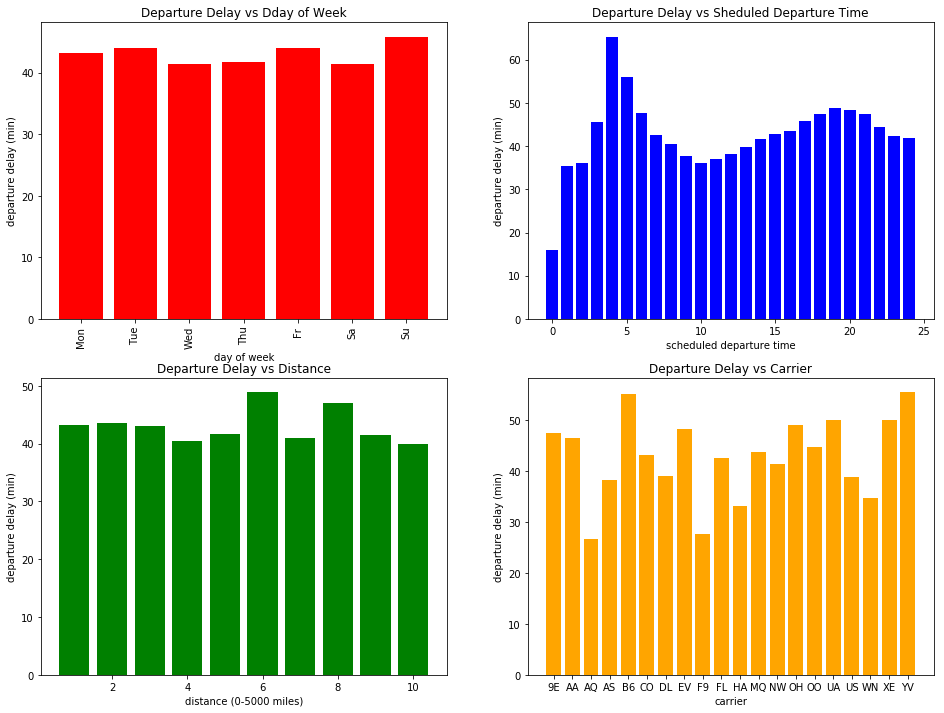

In [51]:
a=df2.groupby(["DayOfWeek"])["DepDelay"].mean().reset_index(name="DepDelay")
b=df2.groupby(["SchedDepTime"])["DepDelay"].mean().reset_index(name="DepDelay")
c=df2.groupby(["Distance"])["DepDelay"].mean().reset_index(name="DepDelay")
d=df2.groupby(["Carrier"])["DepDelay"].mean().reset_index(name="DepDelay")
print(a)
print(b)
print(c)
print(d.sort_values(["DepDelay"], ascending=False))


plt.figure(figsize=(16, 12))
plt.subplot(221)

ax1=plt.bar(a["DayOfWeek"], a["DepDelay"], align='center', color="red")
plt.xlabel("day of week")
plt.ylabel("departure delay (min)")
plt.xticks([1,2,3,4,5,6,7],
          ['Mon','Tue','Wed','Thu', 'Fr', 'Sa','Su'], rotation="vertical")
plt.title("Departure Delay vs Dday of Week")

plt.subplot(222)
ax2=plt.bar(b["SchedDepTime"], b["DepDelay"], align='center', color="blue")
plt.xlabel("scheduled departure time")
plt.ylabel("departure delay (min)")
plt.title("Departure Delay vs Sheduled Departure Time")

plt.subplot(223)
ax3=plt.bar(c["Distance"], c["DepDelay"], align='center', color="green")
plt.xlabel("distance (0-5000 miles)")
plt.ylabel("departure delay (min)")
plt.title("Departure Delay vs Distance")

plt.subplot(224)
ax4=plt.bar(d["Carrier"], d["DepDelay"], align='center', color="orange")
plt.xlabel("carrier")
plt.ylabel("departure delay (min)")
plt.title("Departure Delay vs Carrier")
plt.show()

<font color=blue>***Current project will be focused on business use case concerning passangers search of flights covering some specific criteria. Result of data analysis supposably will lead to an application that will predict delay time based on carrier, distance of flight, time of flight and day of week. Modeling will be based on regression analysis of 4 variables.***</font>